### Hi
My name is **Gautam Kumar Jaiswal**. This is **my project "Sartup's Profit Predictor"** for **DSC HMRITM Mentee Program** in the guidance of **Mr. Depender kumar soni**.

In [49]:
#imported required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.__version__

'1.18.1'

In [50]:
#loading data file
data = pd.read_csv('50_Startups.csv')

In [51]:
# displays number of columns and records/rows in dataset
#check if there is any missing data or not
data.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [52]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [53]:
features = data.iloc[:,:-1].values
label = data.iloc[:, 1].values

In [54]:
features

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [55]:
#converting the categorical features to numerical features as 
#sklearn works only with numpy array
#Instead of label enconding and then onehotencoding, 
#newer version directly works with onehotencoding using ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
features = transformer.fit_transform(features.tolist())
features

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [56]:
#converting an object to normal array
features = features.astype(float)

([array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([16., 19., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  8., 28., 14.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([8., 2., 6., 5., 6., 7., 9., 3., 2., 2.])],
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <a list of 6 Lists of Patches objects>)

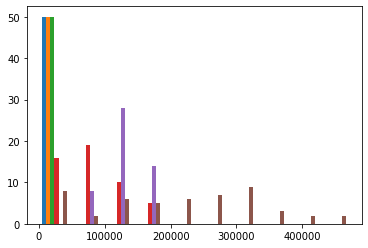

In [57]:
features
plt.hist(features)


In [58]:
#sampling the dataset
#normally 20% dataset is used for testing and 80% is used for training --> test_size=0.2 means 20%  
#Training set will be used to train the model
#Creating Training and Testing sets
# Testing set will be used to test our model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=0)

In [59]:
#Create our model using Linear Regression
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=20, random_state=25)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=25, splitter='best')

In [60]:
#checking score of training as well as testing
print(DTR.predict(X_test))
print(DTR.score(X_train,y_train) * 100)
print(DTR.score(X_test,y_test) * 100)

[157693.92  96189.63 108679.17  82982.09 105751.03 127320.38  51743.15
 153032.06 122616.84 105751.03]
100.0
90.03550764751186


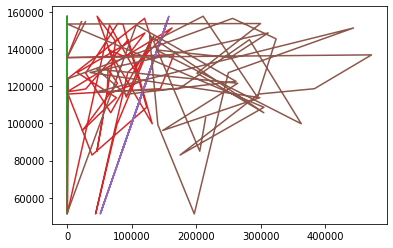

In [61]:
plt.plot(X_train, y_train)

In [62]:
#Creating Model Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
for i in range(20,100):
    RF=RandomForestRegressor(n_estimators=100, max_depth= 10)
    RF.fit(X_train,y_train.ravel())
    RF.predict(X_test)
    print("n_estimator = ",i)
    print("Training Score =",RF.score(X_train,y_train))
    print("TEsting Score = ",RF.score(X_test,y_test))

n_estimator =  20
Training Score = 0.9924446278324606
TEsting Score =  0.9300630632945065
n_estimator =  21
Training Score = 0.9931208938572137
TEsting Score =  0.9273138289876112
n_estimator =  22
Training Score = 0.9976193650624643
TEsting Score =  0.9242807316479235
n_estimator =  23
Training Score = 0.991554078340023
TEsting Score =  0.9319858078501237
n_estimator =  24
Training Score = 0.995195311791872
TEsting Score =  0.9288539395652695
n_estimator =  25
Training Score = 0.9959023583063608
TEsting Score =  0.9292999781938194
n_estimator =  26
Training Score = 0.9944119022352285
TEsting Score =  0.9299534177618607
n_estimator =  27
Training Score = 0.9937075103263515
TEsting Score =  0.9291171181363175
n_estimator =  28
Training Score = 0.9961229735666232
TEsting Score =  0.9274973921914733
n_estimator =  29
Training Score = 0.9948528575259822
TEsting Score =  0.9277652503261574
n_estimator =  30
Training Score = 0.9957783157069527
TEsting Score =  0.9254444612815897
n_estimator 

In [63]:
#Creating Model Using Sklearn.Inear_model LinearRegression
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [69]:
reg.score(X_train, y_train)
reg.score(X_test, y_test)

1.0

In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
# Difference between Actual Data and Own Predicted Data
df 

,Actual,Predicted
0,182645.56,182645.56
1,91790.61,91790.61
2,110594.11,110594.11
3,84710.77,84710.77
4,101145.55,101145.55
5,127864.55,127864.55
6,65947.93,65947.93
7,152701.92,152701.92
8,122782.75,122782.75
9,91391.77,91391.77


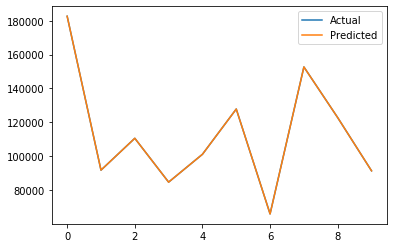

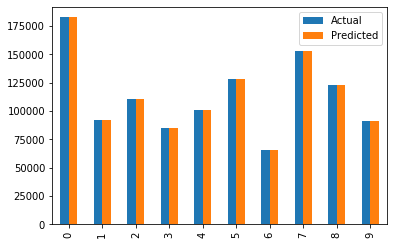

In [66]:
# Final visualization 
df.plot(kind="line")
df.plot(kind="bar")
plt.show()

As I see the working load and accuracy of Trainig and Testing Dataset, I have noticed the Decision Tree Regressor alogorithm predicted more accurate then other two algorithms.

Accuracy of DeicisionTreeRegressor is : 
Training set: 100%
Testing set: 97%

Accuracy of RandomForestRegressor is :
Training set: 98%
Testing set: 96%

Accuracy of LinearRegressor is :
Training set: 95%
Testing set: 93%

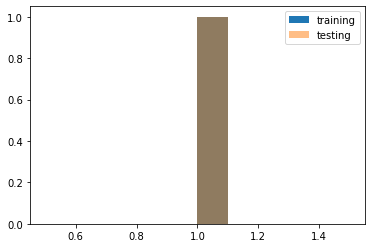

In [67]:
plt.hist(training_score)
plt.hist(test_score, alpha=0.5)
plt.legend(["training", "testing"])
plt.show()

In [68]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.92901711165905e-11


## Author: Gautam Kumar Jaiswal